_Kalp krizi riski'ne ilişkin veri kümesini kullanarak:_
- _Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “average”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?_
- _n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın. Yukarıdaki üç bağlantı yöntemini deneyin ve her bir çözümünüz için ARI ve siluet skorları elde edin. Sonuçları birbirleriyle ve önceki bölümde uyguladığınız k-ortalama çözümü ile karşılaştırın. Hangi algoritma ve ayar daha iyi performans gösterir?_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_excel('heart.xlsx')
df['ca'] = df.ca.replace('<null>', 0)
df['thal'] = df.thal.replace('<null>', 3)
df['num'] = df.num.replace({'positive':1, "negative":0})
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
y = df.num
x = df.drop('num', axis=1)

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

x_pca = PCA(n_components = 2).fit_transform(x_std)

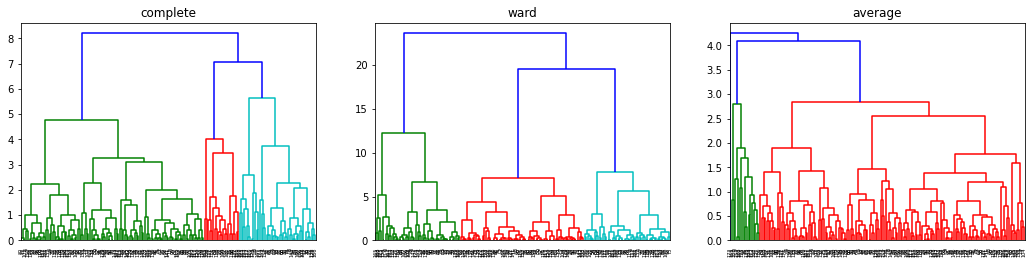

In [4]:
plt.figure(figsize=(18,4))
for num, lk in enumerate(['complete', 'ward', 'average'], 1):
    plt.subplot(1, 3, num)
    dendrogram(linkage(x_pca, method = lk))
    plt.title(lk)

In [5]:
dflabel = pd.DataFrame()
for lk in ['complete', 'ward', 'average']:
    if lk == 'ward':
        y_label = AgglomerativeClustering(linkage = lk, affinity = 'euclidean', n_clusters = 2).fit_predict(x_std)
        dflabel = dflabel.append(pd.DataFrame({'ari' : metrics.adjusted_rand_score(y, y_label),
                                               'silhouette': metrics.silhouette_score(x_pca, y_label)},
                                                index = ['euclidean_'+str(lk)]))
    else:
        for aff in ['l1', 'l2', 'cosine']:
            y_label = AgglomerativeClustering(linkage = lk, affinity = aff, n_clusters = 2).fit_predict(x_std)
            dflabel = dflabel.append(pd.DataFrame({'ari' : metrics.adjusted_rand_score(y, y_label),
                                                   'silhouette': metrics.silhouette_score(x_pca, y_label)},
                                                    index = [str(aff)+'_'+str(lk)]))
dflabel

,ari,silhouette
l1_complete,0.337350,0.297754
l2_complete,0.454083,0.286047
cosine_complete,0.112558,0.230920
euclidean_ward,0.122128,0.181883
l1_average,-0.009815,0.272969
l2_average,-0.009815,0.272969
cosine_average,0.005820,0.219778


- label_2 > 0.067444 - 0.366772 (kmeans)
* ARI değerinin yüksek sonuçlanması beklenir. Silhouette değeri ise (-1,1) aralığında değer almaktadır, yüksek değerler nesnenin kendi kümesiyle iyi eşleştiğini ve komşu kümelerle zayıf eşleştiğini göstermektedir.

> Hiyerarşik yöntem, kmeans yöntemine göre daha düşük performans gösterdi.
> Kullanılan linkage ve affinity parametreleri arasından en iyi skoru l1_complete ve l2_complete elde etti.



